In [1]:
import matplotlib
matplotlib.use("TkAgg")

import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import numpy as np

#%% 

from astropy import constants as ast

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs.value           #constante de gravitacion universal en cgs
c = ast.c.cgs.value           #velocidad de la luz en cgs
#%%
matplotlib.use("TkAgg")

from scipy import constants as sci
pi = sci.pi

#%%
eta_0 = 2.96e12 #son aproximadamente los 47k anios donde domina la rad
eta_b = 21969.3   #escala del bounce
a_b = 7.41155e-9 #factor de normalizacion del factor de escala
xini = eta_0/eta_b  #cte inicial en funcion de x

#definimos cte de normalizacion 
rho_rad_ini = (3*c**2/(8*pi*G))*(1/(a_b*eta_b)**2)*xini**2*(1+xini**2)**(-3)  #dens de rad inicial [erg/cm^3]
#beta = 1e-15
#beta_obs = 0.99999999999999 #el dato observacional 
#beta = beta_obs/(1-beta_obs)
beta =1e-10
rho_bh_ini = beta*rho_rad_ini   

alfa = 2.36
M_min = 1e16
M_max = m_sol*1e6

cteA = (rho_bh_ini*(2-alfa))/(c**2*(M_max**(2-alfa)-M_min**(2-alfa)))


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd

from fractions import Fraction

In [3]:
num_eta = 100000

eta_pos = np.logspace(-20, 13, num_eta)
eta_neg = -eta_pos[::-1] 
eta_int = np.concatenate((eta_neg,[0], eta_pos))
x_int = eta_int/eta_b

In [4]:
rho_bh = np.zeros_like(eta_int) 

Nm = 1000
Masas = np.logspace(np.log10(M_min), np.log10(M_max),Nm)

hlog = (M_max/M_min)**(1/(Nm-1))

i = 0
for x in x_int:
    a = a_b*(1+x**2)**(1/2) #factor de escala
    for M in Masas:
        M_i = M*a
        N_i = cteA*M**(-alfa)*a**(-3)   #densidad inicial de bhs en el bloque i

        delta = M*(hlog-1)

        rho_bh[i] = rho_bh[i]+ N_i*M_i*c**2*delta
        
    i = i+1

rho_bh_norm = rho_bh/rho_bh_ini

In [6]:
print(x_int[100000])

print(rho_bh[100000])

0.0
347416757.2591064


In [8]:
# plot results
fig, ax = plt.subplots()

plt.plot(x_int, rho_bh, color='deeppink')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$\rho_{AN}(x)/\rho_{AN}(x_{ci})$')
plt.yscale('log')

intervalo = [10**1, 10**3, 10**5, 10**7, 10**9]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

plt.show()

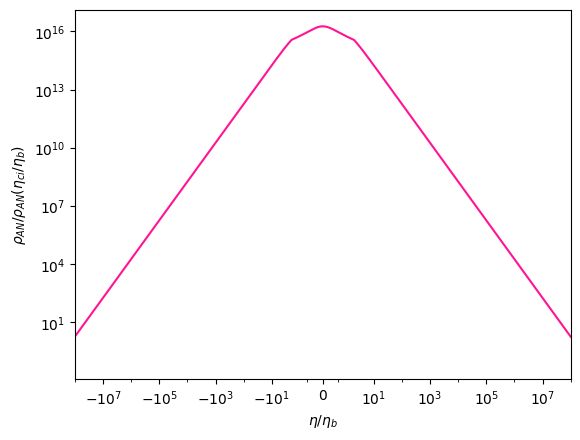

In [22]:
# plot results
fig, ax = plt.subplots()

plt.plot(x_int, rho_bh_norm, color='deeppink')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.xlim([-1e8, 1e8])
plt.ylabel(r'$\rho_{AN}/\rho_{AN}(\eta_{ci}/\eta_b)$')
plt.yscale('log')

intervalo = [ 10**1, 10**3, 10**5, 10**7]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

plt.show()

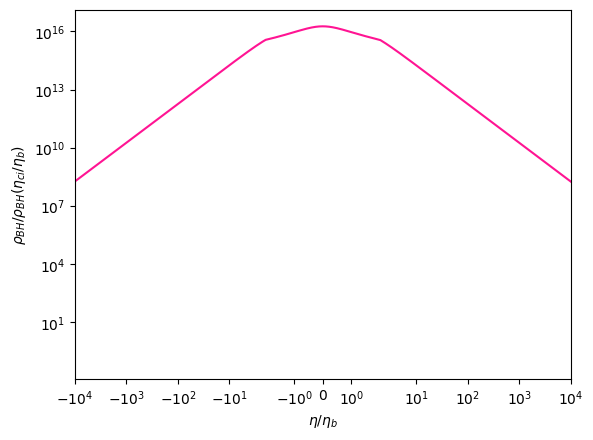

In [11]:
# plot results
fig, ax = plt.subplots()

plt.plot(x_int, rho_bh_norm, color='deeppink')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$\rho_{BH}/\rho_{BH}(\eta_{ci}/\eta_b)$')
plt.yscale('log')

plt.xlim([-1e4,1e4])

#intervalo = [1e5, 1e3, 1e1]
#int_neg = -np.array(intervalo)[::-1]

#ticks_x = np.concatenate((int_neg, [0], intervalo))
#ax.set_xticks(ticks_x)


plt.show()

In [5]:
ctes = (3*c**2)/(8*pi*G*a_b**2*eta_b**2)

rho_cf_solo = ctes*x_int**2*(1+x_int**2)**(-3)
rho_cf = rho_cf_solo -rho_bh

rho_cf_norm = rho_cf/(rho_rad_ini-rho_bh_ini)

/tmp/ipykernel_5615/725202157.py:11: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=0, color='grey', linestyle='--')


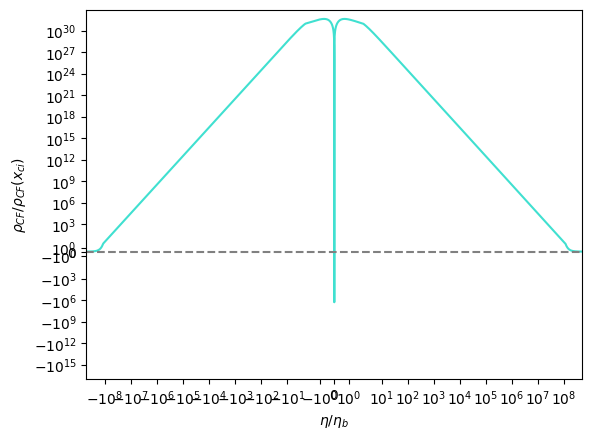

In [8]:
# plot results

fig, ax = plt.subplots()

plt.plot(x_int, rho_cf_norm, color = 'turquoise')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylim([-1e17, 1e33])
plt.xscale('symlog')
plt.ylabel(r'$\rho_{CF}/\rho_{CF}(x_{ci})$')
plt.yscale('symlog')
plt.axhline(y=0, color='grey', linestyle='--')

plt.show()

In [10]:
# plot results

fig, ax = plt.subplots()

plt.plot(x_int, rho_cf_norm, color = 'turquoise')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylim([-1e9, 1e33])
plt.xlim([-1e4, 1e4])
plt.xscale('symlog', linthresh=0.000000000000001)
plt.ylabel(r'$\rho_{FC}/\rho_{FC}(\eta_{ci}/\eta_b)$')
plt.yscale('symlog')
plt.axhline(y=0, color='lightgrey', linestyle='--')

intervalo = [ 1e-13, 1e-8, 1e-3, 1e2]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

ticks_y = [ -1e6, -1e3, 0, 1e3, 1e6, 1e12, 1e18, 1e24, 1e30, 1e9, 1e15, 1e21, 1e27]
ax.set_yticks(ticks_y)

plt.show()

In [11]:
print(x_int[100000])

print(rho_cf[100000])

print(rho_cf_norm[100000])

0.0
-347416757.2591064
-1888366.0168559353


/tmp/ipykernel_6578/1358670567.py:14: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=0, color='lightgrey', linestyle='--')


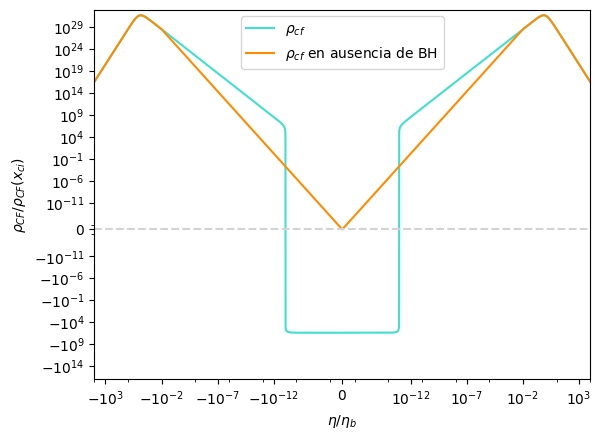

In [10]:

fig, ax = plt.subplots()

data_sinbh = pd.read_csv("rhocf_sin_gasBH_largo.csv", header=None, names=["x", "rhocf_sinBH"])
data_sinbh["x"] = data_sinbh["x"].apply(lambda x: float(Fraction(x)))

plt.plot(x_int, rho_cf_norm, color = 'turquoise', label=r'$\rho_{cf}$')
plt.plot(data_sinbh['x'], data_sinbh["rhocf_sinBH"], color= 'darkorange', label=r'$\rho_{cf}$ en ausencia de BH')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylim([-1e17, 1e33])
plt.xlim([-1e4, 1e4])
plt.xscale('symlog', linthresh=0.00000000000000001)
plt.ylabel(r'$\rho_{CF}/\rho_{CF}(x_{ci})$')
plt.yscale('symlog', linthresh=0.0000000000000001)
plt.axhline(y=0, color='lightgrey', linestyle='--')
plt.legend(loc='upper center', )

intervalo = [ 1e-12, 1e-7, 1e-2, 1e3]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)


ticks_y = [-1e14, -1e9, -1e4, -1e-1, -1e-6, -1e-11, 0, 1e-11, 1e-6, 1e-1, 1e4, 1e9, 1e14, 1e19, 1e24, 1e29]
ax.set_yticks(ticks_y)

plt.show()

In [8]:
#presion analitica 

P_cf = (c**2)/(8*pi*G*a_b**2*eta_b**2)*((x_int**2-2)/(1+x_int**2)**3)
P_ini = (c**2)/(8*pi*G*a_b**2*eta_b**2)*((xini**2-2)/(1+xini**2)**3)

P_norm = P_cf/P_ini

In [10]:
# plot results

fig, ax = plt.subplots()

plt.plot(x_int, P_norm, color = 'mediumseagreen')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$P_{cf}$')
plt.yscale('symlog')
plt.axhline(y=0, color='lightgrey', linestyle='--')

intervalo = [1e2 ,1e4, 1e6, 1e8, 1]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

ticks_y = [0, 1e5, 1e10, 1e15, 1e20, 1e25, 1e30, 1e35, 1e40, -1e5, -1e10, -1e15, -1e20, -1e25, -1e30, -1e35, -1e40]
ax.set_yticks(ticks_y)


plt.show()

In [12]:
#presion 

#primero defino la derivda de la densidad del fluido cosmologico

def der_rho(rho, etavar, k):
    drho = (rho[k+1] - rho[k])/(etavar[k+1]-etavar[k])
    return drho

der_rho_cf = np.zeros_like(eta_int) 
for k in range(len(eta_int)-1):
    der_rho_cf[k]= der_rho(rho_cf, x_int, k)


#defino Q

Q_inter = np.zeros_like(eta_int) 

a_vector = a_b*(1+x_int**2)**(1/2) #factor de escala definido como vector

j = 1
for i in range(len(x_int) - 1):  
    x = x_int[i]  
    a = a_b * (1 + x**2)**(1/2)  # factor de escala
    for M in Masas:
        M_i = M * a
        N_0 = cteA * M**(-alfa)

        dNdeta = N_0 / (x_int[j] - x_int[j-1]) * (a_vector[j]**(-3) - a_vector[j-1]**(-3))

        delta = M * (hlog - 1)

        Q_inter[j] = Q_inter[j] + dNdeta * M_i * c**2 * delta

    j += 1 

P_cf = (1/3)*(eta_b/x_int)*(1+x_int**2)*(-Q_inter-(1/eta_b)*der_rho_cf)-rho_cf

/tmp/ipykernel_69701/4253838920.py:36: RuntimeWarning: divide by zero encountered in divide
  P_cf = (1/3)*(eta_b/x_int)*(1+x_int**2)*(-Q_inter-(1/eta_b)*der_rho_cf)-rho_cf
/tmp/ipykernel_69701/4253838920.py:36: RuntimeWarning: invalid value encountered in multiply
  P_cf = (1/3)*(eta_b/x_int)*(1+x_int**2)*(-Q_inter-(1/eta_b)*der_rho_cf)-rho_cf


In [25]:
# plot results

fig, ax = plt.subplots()

plt.plot(x_int, P_cf, color = 'mediumseagreen')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$P_{cf}$')
plt.yscale('symlog')
plt.axhline(y=0, color='lightgrey', linestyle='--')

intervalo = [1e2 ,1e4, 1e6, 1e8, 1]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

ticks_y = [0, 1e5, 1e10, 1e15, 1e20, 1e25, 1e30, 1e35, 1e40, -1e5, -1e10, -1e15, -1e20, -1e25, -1e30, -1e35, -1e40]
ax.set_yticks(ticks_y)


plt.show()

In [24]:
# plot results

fig, ax = plt.subplots()

omega_sindiv = omega_cf[:-1]
x_int_div = x_int[:-1]

plt.plot(x_int_div, omega_sindiv, color = 'mediumseagreen')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog', linthresh=0.0000000000000001)
plt.ylabel(r'$\omega_{FC}$')
plt.yscale('symlog')
plt.ylim([-1e29, 1e29])
plt.axhline(y=0, color='grey', linestyle='--')

intervalo = [1e-12, 1e-6, 1e8, 1]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

ticks_y = [-1e28, -1e20, -1e12, -1e4, 0 , 1e4, 1e12, 1e20, 1e28, -1e24, 1e24, 1e16, -1e16, 1e8, -1e8]
ax.set_yticks(ticks_y)


plt.show()

NameError: name 'omega_cf' is not defined

In [ ]:
#condicion NEC

NEC = rho_cf + P_cf
fig, ax = plt.subplots()

plt.plot(x_int, NEC, color = 'darkorange')
plt.xlabel(r'$\eta/\eta_b$')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel(r'$\rho_{CF}+P_{CF}$', labelpad=-3)
plt.xscale('symlog', linthresh=0.0001)
plt.yscale('symlog')


intervalo = [1e-3, 1e0, 1e3, 1e6, 1e9]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

intervalo_y = [1e5, 1e10, 1e15, 1e20, 1e25, 1e30, 1e35]
int_neg_y = -np.array(intervalo_y)[::-1]

ticks_y = np.concatenate((int_neg_y, [0], intervalo_y))
ax.set_yticks(ticks_y)

plt.show()

In [12]:
#condicion SEC

SEC = rho_cf + 3*P_cf

fig, ax = plt.subplots()

plt.plot(x_int, SEC, color = 'mediumorchid')
plt.xlabel(r'$\eta/\eta_b$')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel(r'$\rho_{CF}+3P_{CF}$', labelpad=-3)
plt.xscale('symlog', linthresh=0.0001)
plt.yscale('symlog')
#plt.ylim([-1e35,1e35])

intervalo = [1e-3, 1e0, 1e3, 1e6, 1e9]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

intervalo_y = [1e5, 1e10, 1e15, 1e20, 1e25, 1e30, 1e35]
int_neg_y = -np.array(intervalo_y)[::-1]

ticks_y = np.concatenate((int_neg_y, [0], intervalo_y))
ax.set_yticks(ticks_y)

plt.show()